In [426]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import random
from IPython.display import clear_output

In [427]:
pineapples_images = np.load('pineapple.npy')
pineapples_labels = np.zeros((pineapples_images.shape[0], 2))
pineapples_labels[:, 0] = 1;
pens_images = np.load('pen.npy')
pens_labels = np.zeros((pens_images.shape[0], 2))
pens_labels[:, 1] = 1

In [428]:
print('pineapples', pineapples_images.shape, pineapples_labels.shape)
print('pens', pens_images.shape, pens_labels.shape)

('pineapples', (125071, 784), (125071, 2))
('pens', (122001, 784), (122001, 2))


In [429]:
TRAIN_SIZE = 100000
train_dataset = np.concatenate((pineapples_images[0:TRAIN_SIZE], pens_images[0:TRAIN_SIZE]))
train_labels = np.concatenate((pineapples_labels[0:TRAIN_SIZE], pens_labels[0:TRAIN_SIZE]))

TEST_SIZE = 20000
offset = TRAIN_SIZE
test_dataset = np.concatenate((pineapples_images[offset:offset + TEST_SIZE], pens_images[offset:offset + TEST_SIZE]))
test_labels = np.concatenate((pineapples_labels[offset:offset + TEST_SIZE], pens_labels[offset:offset + TEST_SIZE]))


VALIDATION_SIZE = 10000
offset = offset + TEST_SIZE
validation_dataset = np.concatenate((pineapples_images[offset:offset + VALIDATION_SIZE], pens_images[offset:offset + VALIDATION_SIZE]))
validation_labels = np.concatenate((pineapples_labels[offset:offset + VALIDATION_SIZE], pens_labels[offset:offset + VALIDATION_SIZE]))


In [430]:
print('Training set', train_dataset.shape, train_labels.shape)

('Training set', (200000, 784), (200000, 2))


In [431]:
print('Test set', test_dataset.shape, test_labels.shape)

('Test set', (40000, 784), (40000, 2))


In [432]:
print('Validation set', validation_dataset.shape, validation_labels.shape)

('Validation set', (7072, 784), (7072, 2))


In [433]:
import matplotlib.pyplot as pl
%matplotlib inline

In [434]:
def shuffle_images_and_labels(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

pineapple


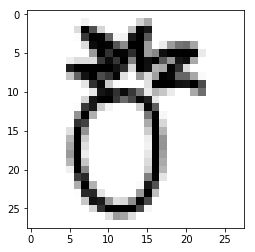

In [442]:
train_dataset, train_labels = shuffle_images_and_labels(train_dataset, train_labels)
test_dataset, test_labels = shuffle_images_and_labels(test_dataset, test_labels)
validation_dataset, validation_labels = shuffle_images_and_labels(validation_dataset, validation_labels)

sample = test_dataset[1]
sample = sample.reshape(28,28)
pl.imshow(sample, cmap="gray_r")
print("pen" if (test_labels[1, 0] == 0) else "pineapple")

In [436]:
graph = tf.Graph()

with graph.as_default():
    tf_train_dataset = tf.placeholder(tf.float32, shape=[128, 28*28])
    tf_train_labels = tf.placeholder(tf.int64, shape=[128, 2])
    
    weights = tf.Variable(tf.random_uniform([784, 2]))
    biases = tf.Variable(tf.random_uniform([2]))
    
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
    
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    tf_test_dataset = tf.cast(tf.constant(test_dataset), tf.float32)
    tf_validation_dataset = tf.cast(tf.constant(validation_dataset), tf.float32)
    
    train_prediction = tf.nn.softmax((tf.matmul(tf_train_dataset, weights) + biases))
    test_prediction = tf.nn.softmax((tf.matmul(tf_test_dataset, weights) + biases))
    validation_prediction = tf.nn.softmax((tf.matmul(tf_validation_dataset, weights) + biases))

In [437]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.equal(np.argmax(predictions, 1), np.argmax(labels, 1))) / predictions.shape[0])

In [440]:
NUM_STEPS = 10001
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for step in range(NUM_STEPS):
        offset = (step * 128) % (train_labels.shape[0] -128)
        batch_data = train_dataset[offset:(offset + 128), :]
        batch_labels = train_labels[offset:(offset + 128)]
        feed_dict = { tf_train_dataset: batch_data, tf_train_labels: batch_labels }
       
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if(step % 500 == 0):
            clear_output(wait=True)
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation error %.1f%%" % accuracy(validation_prediction.eval(), validation_labels))
    print("Successfully ended iteration %d" % step)
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Minibatch loss at step 10000: 20669.662109
Minibatch accuracy: 89.8%
Validation error 92.8%
Successfully ended iteration 10000
Test accuracy: 93.5%
